In [1]:
import pandas as pd
import numpy as np
import keras as keras
trainFile_letras = "DatasetsIAO/Letras/sign_mnist_train.csv"
testFile_letras = "DatasetsIAO/Letras/sign_mnist_test.csv"
path_npy = "DatasetsIAO/Letras/"

# Estos tienen solo una sola salida. 24x24
letras_train = pd.read_csv(trainFile_letras)
letras_test = pd.read_csv(testFile_letras)

Using TensorFlow backend.
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/david/.local/lib/python3.6/site-packages/tensorflow/python/fra

In [2]:
print(letras_train.shape)
print(letras_test.shape)

(27455, 785)
(7172, 785)


In [23]:
letras_train['label']

15459    24
17664    17
7536      1
7260     20
20085     2
         ..
16682    11
15387    21
9907     21
27423    22
16607     3
Name: label, Length: 20455, dtype: int64

In [4]:
# Concatenamos las columnas para poder manejarlas mejor al hacer shuffle

from sklearn.utils import shuffle
# Aleatorizamos las imagenes
letras_train = shuffle(letras_train)

letras_val = letras_train[:7000]
letras_train = letras_train.drop(range(0, 7000), axis=0)

In [5]:
letras_train_Y = letras_train['label']
letras_train_X = letras_train.drop('label', axis=1)

letras_test_Y = letras_test['label']
letras_test_X = letras_test.drop('label', axis=1)

letras_val_Y = letras_val['label']
letras_val_X = letras_val.drop('label', axis=1)

In [6]:
letras_train_Y

15459    24
17664    17
7536      1
7260     20
20085     2
         ..
16682    11
15387    21
9907     21
27423    22
16607     3
Name: label, Length: 20455, dtype: int64

In [7]:
letras_train_X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15459,135,140,144,148,151,153,156,158,159,160,...,98,96,95,94,93,95,143,188,188,165
17664,141,143,144,144,145,146,146,147,148,148,...,103,60,128,198,171,151,111,79,53,51
7536,74,78,85,100,118,131,138,142,149,155,...,107,77,45,41,44,20,14,39,44,15
7260,138,140,143,145,147,149,151,153,154,155,...,166,132,97,81,82,150,211,215,214,214
20085,182,183,185,186,186,186,186,186,185,185,...,201,202,202,201,200,199,196,231,253,243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16682,153,155,158,160,160,163,164,164,165,165,...,189,189,188,188,188,188,187,187,186,184
15387,131,135,139,142,146,148,151,155,157,161,...,75,65,95,116,118,124,127,132,147,173
9907,131,134,137,142,147,151,154,157,158,161,...,200,207,206,205,203,201,201,200,199,196
27423,116,120,124,127,131,135,139,143,146,148,...,141,129,91,116,192,208,208,207,206,205


In [8]:
letras_val_X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15459,135,140,144,148,151,153,156,158,159,160,...,98,96,95,94,93,95,143,188,188,165
3363,136,145,155,163,167,169,172,180,185,190,...,255,172,110,104,94,86,85,85,85,81
17664,141,143,144,144,145,146,146,147,148,148,...,103,60,128,198,171,151,111,79,53,51
7536,74,78,85,100,118,131,138,142,149,155,...,107,77,45,41,44,20,14,39,44,15
7260,138,140,143,145,147,149,151,153,154,155,...,166,132,97,81,82,150,211,215,214,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23652,176,177,177,179,179,178,179,177,177,178,...,0,0,0,0,0,0,16,0,0,0
359,140,141,143,144,145,148,151,152,153,155,...,111,112,166,185,186,185,185,185,186,186
4253,84,96,114,125,129,134,140,144,147,151,...,47,40,24,50,49,22,34,55,53,46
26070,145,161,190,202,210,217,220,224,226,229,...,159,255,255,255,255,255,255,255,255,255


In [9]:
letras_val_Y

15459    24
3363     15
17664    17
7536      1
7260     20
         ..
23652    14
359       8
4253      3
26070     5
4214     21
Name: label, Length: 7000, dtype: int64

In [10]:
letras_val

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
15459,24,135,140,144,148,151,153,156,158,159,...,98,96,95,94,93,95,143,188,188,165
3363,15,136,145,155,163,167,169,172,180,185,...,255,172,110,104,94,86,85,85,85,81
17664,17,141,143,144,144,145,146,146,147,148,...,103,60,128,198,171,151,111,79,53,51
7536,1,74,78,85,100,118,131,138,142,149,...,107,77,45,41,44,20,14,39,44,15
7260,20,138,140,143,145,147,149,151,153,154,...,166,132,97,81,82,150,211,215,214,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23652,14,176,177,177,179,179,178,179,177,177,...,0,0,0,0,0,0,16,0,0,0
359,8,140,141,143,144,145,148,151,152,153,...,111,112,166,185,186,185,185,185,186,186
4253,3,84,96,114,125,129,134,140,144,147,...,47,40,24,50,49,22,34,55,53,46
26070,5,145,161,190,202,210,217,220,224,226,...,159,255,255,255,255,255,255,255,255,255


In [11]:
from keras.utils import np_utils

# Hacemos el reshape para que las imagenes tengan el tamaño correcto
letras_train_X = letras_train_X.values.reshape(letras_train_X.shape[0], 28, 28, 1)
letras_test_X = letras_test_X.values.reshape(letras_test_X.shape[0], 28, 28, 1)
letras_val_X = letras_val_X.values.reshape(letras_val_X.shape[0], 28, 28, 1)


# Pasamos las salidas a one hot encoding. Aunque tenemos 24 clases
# obtenemos un array de 25 posiciones. Esto se debe a que la J (numero
# 9) también se tiene en cuenta, aunque no aparezca en ningún momento.
letras_train_Y = np_utils.to_categorical(letras_train_Y)
letras_test_Y = np_utils.to_categorical(letras_test_Y)
letras_val_Y = np_utils.to_categorical(letras_val_Y)

In [12]:
print(letras_train_X.shape)
print(letras_train_Y.shape)

print(letras_test_X.shape)
print(letras_test_Y.shape)

print(letras_val_X.shape)
print(letras_val_Y.shape)

(20455, 28, 28, 1)
(20455, 25)
(7172, 28, 28, 1)
(7172, 25)
(7000, 28, 28, 1)
(7000, 25)


In [13]:
from matplotlib import pyplot as plt

example = letras_train_X[1000].reshape(28, 28)

print(example.shape)
plt.imshow(example, cmap="gray")

(28, 28)


(28, 28)


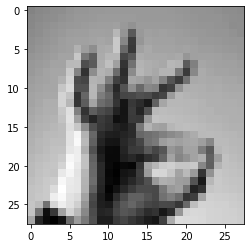

In [14]:
from matplotlib import pyplot as plt

example = letras_val_X[56].reshape(28, 28)

print(example.shape)
plt.imshow(example, cmap="gray")

(28, 28)


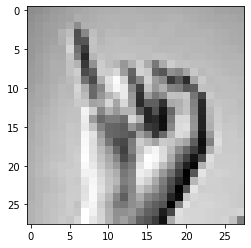

In [15]:
example = letras_train_X[1782].reshape(28, 28)

print(example.shape)
plt.imshow(example, cmap="gray")

In [16]:
np.save(path_npy + "letras_train_X.npy", letras_train_X)
np.save(path_npy + "letras_train_Y.npy", letras_train_Y)
np.save(path_npy + "letras_test_X.npy", letras_test_X)
np.save(path_npy + "letras_test_Y.npy", letras_test_Y)
np.save(path_npy + "letras_val_X.npy", letras_val_X)
np.save(path_npy + "letras_val_Y.npy", letras_val_Y)